#Fase 1.1 - Recolección de la voz del cliente desde Google Play

In [2]:
# Importante: Toda la información a utilizar es de caracter público.

# Instalación de la librería necesaria
print("Instalando la librería 'google-play-scraper'...")
!pip install -q google-play-scraper
print("Instalación finalizada.")

# Importación de librerías
from google_play_scraper import reviews
import pandas as pd

# Definición del ID de la aplicación de Mercado Pago
app_id = 'com.mercadopago.wallet'

# Descarga de las reseñas (hasta 100)
result, continuation_token = reviews(
    app_id,
    lang='es',        # Idioma español
    country='ar',     # Argentina
    count=100         # Cantidad máxima a descargar en esta ejecución
)

# Validación de la descarga
if len(result) > 0:
    print(f"Se descargaron {len(result)} reseñas de la app {app_id}.")

    # Ejemplo de una reseña descargada (para inspección)
    print("Primera reseña:")
    print(result[0])
else:
    print(f"No se encontraron reseñas para la app {app_id}.")

Instalando la librería 'google-play-scraper'...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
Instalación finalizada.
Se descargaron 100 reseñas de la app com.mercadopago.wallet.
Primera reseña:
{'reviewId': '59c285a7-db2e-4243-bd0d-9edb0033a64a', 'userName': 'Milagros Montebello', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIKAyh5wO_uwD_H4FNZrYaPYTT30s-yzdAnDjTpPCl6pG507w=mo', 'content': 'La mejor', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '2.388.0', 'at': datetime.datetime(2025, 7, 8, 23, 20, 39), 'replyContent': None, 'repliedAt': None, 'appVersion': '2.388.0'}


Fase 1.2 - Descarga masiva de reseñas de varias apps y guardado en archivo .CSV

In [11]:
# Instalación de la librería necesaria
print("Instalando la librería 'google-play-scraper'...")
!pip install -q google-play-scraper
print("Instalación finalizada.")

# Importación de librerías
from google_play_scraper import reviews
import pandas as pd
import time

# Lista de apps a analizar con sus respectivos IDs y nombres
apps_a_analizar = [
    {'id': 'com.mercadopago.wallet', 'nombre': 'Mercado Pago'},
    {'id': 'com.uala.uala', 'nombre': 'Ualá'},
    {'id': 'com.naranjax.app', 'nombre': 'Naranja X'},
    {'id': 'com.lacaja.lacajaseguros', 'nombre': 'La Caja Seguros'},
    {'id': 'com.santander.app', 'nombre': 'Santander Argentina'}
]

# Lista donde se almacenarán todas las reseñas recolectadas
lista_final_de_reseñas = []

# Número de reseñas a descargar por app
reseñas_por_app = 500

print("Iniciando descarga de reseñas...")

# Bucle para recorrer cada app y descargar sus reseñas
for app_actual in apps_a_analizar:
    print(f"Descargando reseñas de: {app_actual['nombre']}...")

    # Descargar reseñas usando la función 'reviews'
    reseñas_encontradas, _ = reviews(
        app_actual['id'],
        lang='es',
        country='ar',
        count=reseñas_por_app
    )

    # Agregar el nombre de la app a cada reseña para identificar su origen
    for reseña in reseñas_encontradas:
        reseña['appName'] = app_actual['nombre']

    # Añadir las reseñas obtenidas a la lista principal
    lista_final_de_reseñas.extend(reseñas_encontradas)

    print(f"-> Descargadas {len(reseñas_encontradas)} reseñas de {app_actual['nombre']}.")

    # Pausa de 1 segundo para evitar saturar el servidor
    time.sleep(1)

print(f"\nDescarga completa. Total de reseñas recolectadas: {len(lista_final_de_reseñas)}")

print("Convirtiendo datos a tabla y guardando en archivo CSV...")

# Convertir la lista de reseñas en un DataFrame de pandas
tabla_de_reseñas = pd.DataFrame(lista_final_de_reseñas)

# Nombre del archivo donde se guardarán las reseñas
nombre_del_archivo = "reseñas_de_apps.csv"

# Guardar el DataFrame en un archivo CSV con codificación para caracteres en español
tabla_de_reseñas.to_csv(nombre_del_archivo, index=False, encoding='utf-8-sig')

print(f"Archivo guardado correctamente: '{nombre_del_archivo}'")


Instalando la librería 'google-play-scraper'...
Instalación finalizada.
Iniciando descarga de reseñas...
Descargando reseñas de: Mercado Pago...
-> Descargadas 500 reseñas de Mercado Pago.
Descargando reseñas de: Ualá...
-> Descargadas 0 reseñas de Ualá.
Descargando reseñas de: Naranja X...
-> Descargadas 0 reseñas de Naranja X.
Descargando reseñas de: La Caja Seguros...
-> Descargadas 0 reseñas de La Caja Seguros.
Descargando reseñas de: Santander Argentina...
-> Descargadas 500 reseñas de Santander Argentina.

Descarga completa. Total de reseñas recolectadas: 1000
Convirtiendo datos a tabla y guardando en archivo CSV...
Archivo guardado correctamente: 'reseñas_de_apps.csv'


#Fase 2: Limpieza y preparación de datos

In [13]:
# Antes de analizar los datos, es necesario limpiarlos para que los resultados del análisis sean confiables.

import pandas as pd

nombre_del_archivo = "reseñas_de_apps.csv"

# Uso pandas para leer el archivo CSV y cargarlo en una tabla (DataFrame).
# El 'try-except' es una buena práctica por si escribo mal el nombre del archivo.
try:
    df_crudo = pd.read_csv(nombre_del_archivo)
    print(f"¡Archivo '{nombre_del_archivo}' cargado con éxito!")
    print(f"La tabla tiene {df_crudo.shape[0]} filas y {df_crudo.shape[1]} columnas.")
except FileNotFoundError:
    print(f"No se encontró el archivo'{nombre_del_archivo}'. Asegúrate de que el nombre esté bien escrito y cargado en Google Colab.")

# Inspeccionamos los datos para entenderlos mejor
print("\n--- Un primer vistazo a los datos (las primeras 3 filas) ---")
print(df_crudo.head(5))

print("\n--- Información técnica de la tabla ---")
df_crudo.info()

# Dado que no se necesitan todas las columnas, nos quedaremos sólo con las más importantes.
columnas_utiles = [
    'content',  # La opinión del usuario.
    'score',    # El puntaje que le dio (de 1 a 5).
    'at',       # La fecha en que escribió la opinión.
    'appName'   # El nombre de la app (¡clave para poder comparar!).
]

df_limpio = df_crudo[columnas_utiles].copy() # El .copy() es para evitar un aviso de pandas.

print("\nMe quedé solo con las 4 columnas que necesito para el análisis.")

# Arreglar formatos y revisar si falta algo (nulos)
# La columna de fecha ('at') se cargó como texto. La convierto a un formato de fecha real.
# Esto me permitirá hacer análisis por mes o por año más adelante.
df_limpio['at'] = pd.to_datetime(df_limpio['at'])

# Reviso si hay valores nulos en el texto de la opinión.
print("\n--- Revisión de opiniones vacías (nulos) ---")
print(df_limpio.isnull().sum())

# Si alguna fila tiene la opinión vacía, no me sirve, así que la elimino.
df_limpio.dropna(subset=['content'], inplace=True)
print("\nFilas con opiniones vacías (si las había) fueron eliminadas.")

print("\n--- ¡Fase de limpieza completada! ---")
print("Mi tabla de datos ahora está limpia, ordenada y lista para ser analizada.")
print("\n--- Muestra final de la tabla limpia ---")
print(df_limpio.head())

¡Archivo 'reseñas_de_apps.csv' cargado con éxito!
La tabla tiene 1000 filas y 12 columnas.

--- Un primer vistazo a los datos (las primeras 3 filas) ---
                               reviewId                         userName  \
0  17fb7c92-7252-403d-9815-111618f3b656                     Maxi Carrizo   
1  2c8b05cd-bb78-47eb-8a94-51fb10a69afd           Johanna Rodríguez Espi   
2  7476f960-a177-4f9a-9c06-7a98a904eaa3             Iran Javier Rousseau   
3  2fe0d28f-1251-49ff-8023-2bb60d4a8693                     Diana Casali   
4  9b5886f5-831e-43b0-8024-5f169792719c  Julio del Carmen Pinzón pacheco   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content 

#Fase 3 - Análisis Exploratorio de Datos (EDA)

Herramientas de visualización listas.

--- Análisis 1: Distribución de puntuaciones por app ---


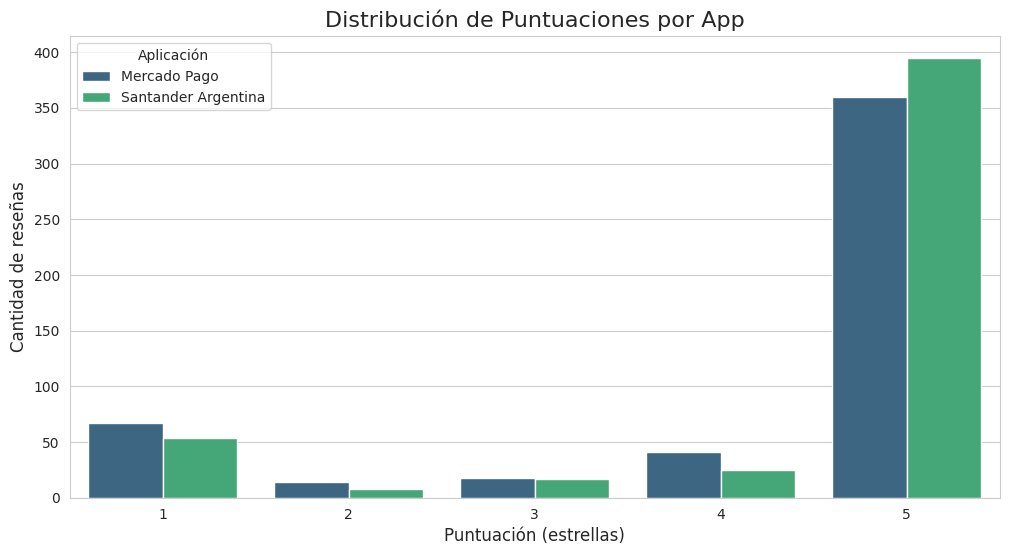


--- Análisis 2: Calificación promedio por app ---
Calificación promedio por app:
appName
Mercado Pago           4.23
Santander Argentina    4.40
Name: score, dtype: float64


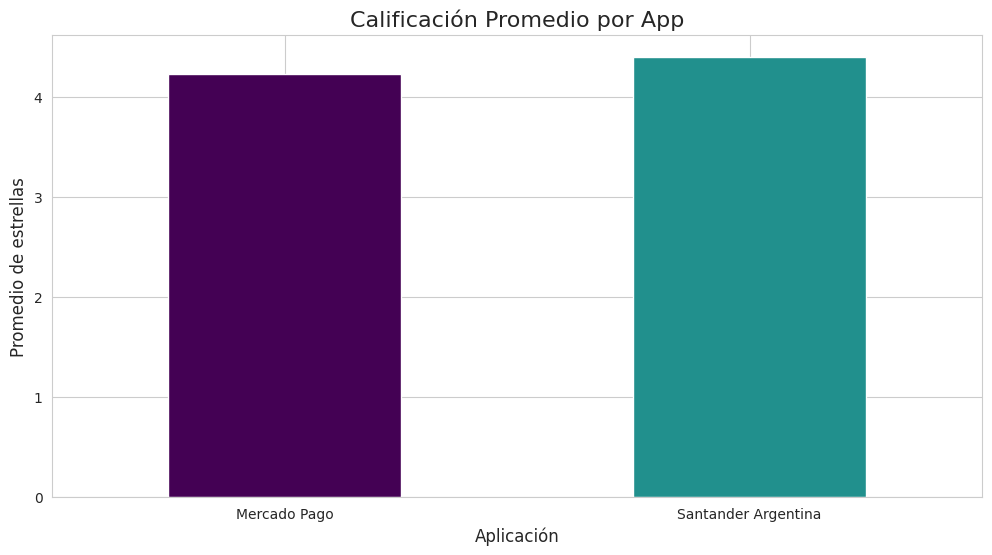


--- Análisis 3: Volumen de reseñas por mes ---


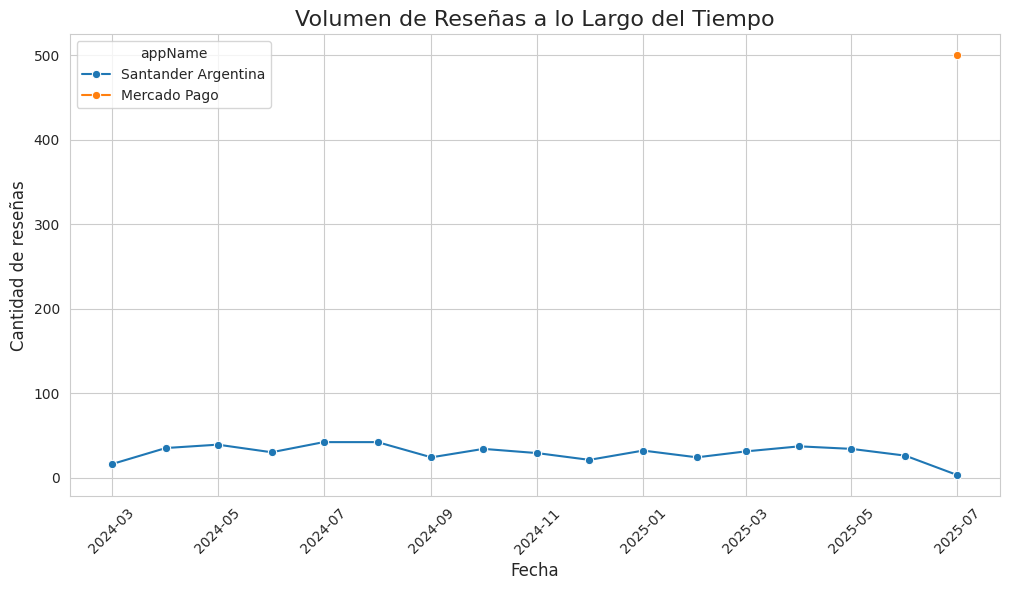


Análisis exploratorio completado.


In [14]:
# Fase 3 - Análisis exploratorio de los datos

# Con los datos ya limpios, ahora comienzo a analizarlos para identificar patrones y diferencias entre las apps.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rc('figure', figsize=(12, 6))

print("Herramientas de visualización listas.")

# Análisis 1: Distribución de puntuaciones por app
print("\n--- Análisis 1: Distribución de puntuaciones por app ---")

plt.figure()
ax = sns.countplot(data=df_limpio, x='score', hue='appName', palette='viridis')

plt.title('Distribución de Puntuaciones por App', fontsize=16)
plt.xlabel('Puntuación (estrellas)', fontsize=12)
plt.ylabel('Cantidad de reseñas', fontsize=12)
plt.legend(title='Aplicación')
plt.show()

# Análisis 2: Calificación promedio por app
print("\n--- Análisis 2: Calificación promedio por app ---")

calificacion_promedio = df_limpio.groupby('appName')['score'].mean().round(2)

print("Calificación promedio por app:")
print(calificacion_promedio)

plt.figure()
calificacion_promedio.plot(kind='bar', color=['#440154', '#21908d'])

plt.title('Calificación Promedio por App', fontsize=16)
plt.xlabel('Aplicación', fontsize=12)
plt.ylabel('Promedio de estrellas', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Análisis 3: Volumen de reseñas por mes
print("\n--- Análisis 3: Volumen de reseñas por mes ---")

df_limpio['mes'] = df_limpio['at'].dt.to_period('M')
reseñas_por_mes = df_limpio.groupby(['mes', 'appName']).size().reset_index(name='cantidad')
reseñas_por_mes['mes'] = reseñas_por_mes['mes'].dt.to_timestamp()

plt.figure()
sns.lineplot(data=reseñas_por_mes, x='mes', y='cantidad', hue='appName', marker='o')

plt.title('Volumen de Reseñas a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de reseñas', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nAnálisis exploratorio completado.")

#Fase 4 - Análisis de texto y nubes de palabras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Herramientas listas. Vamos con el análisis de texto.

Opiniones separadas: 821 positivas y 143 negativas.

Generando nubes de palabras...


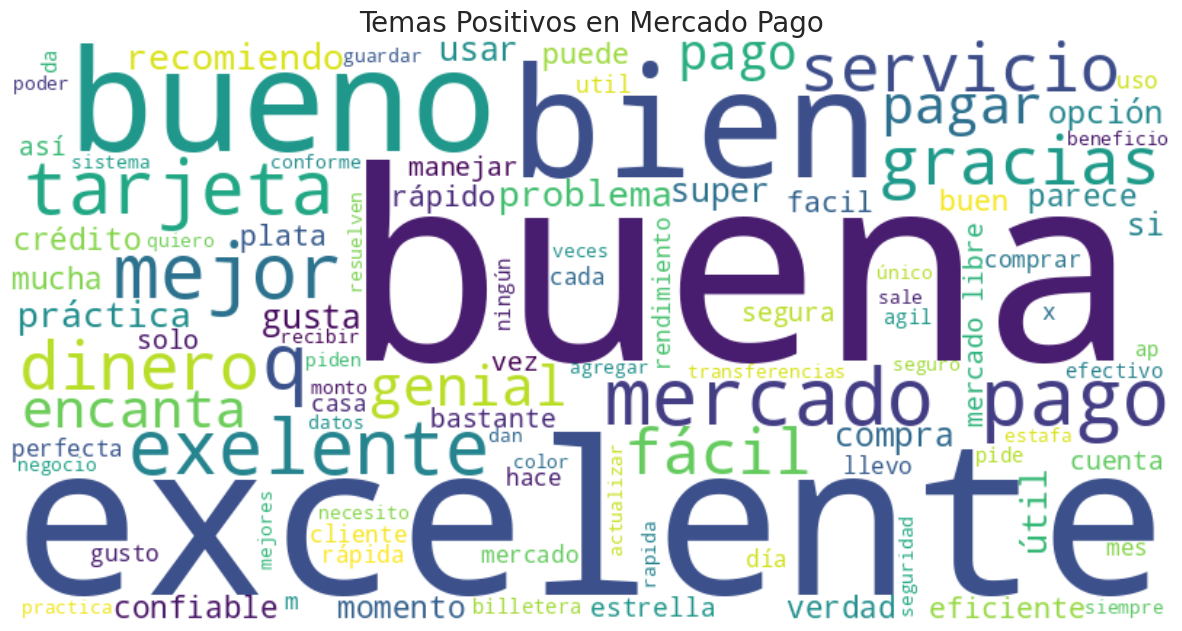

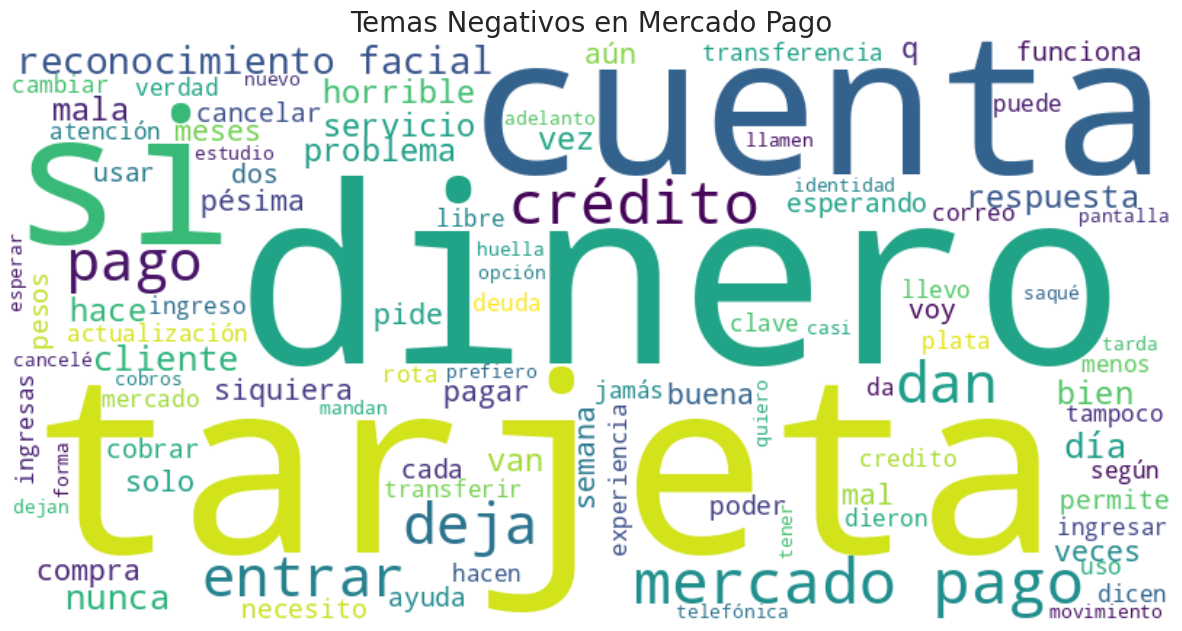

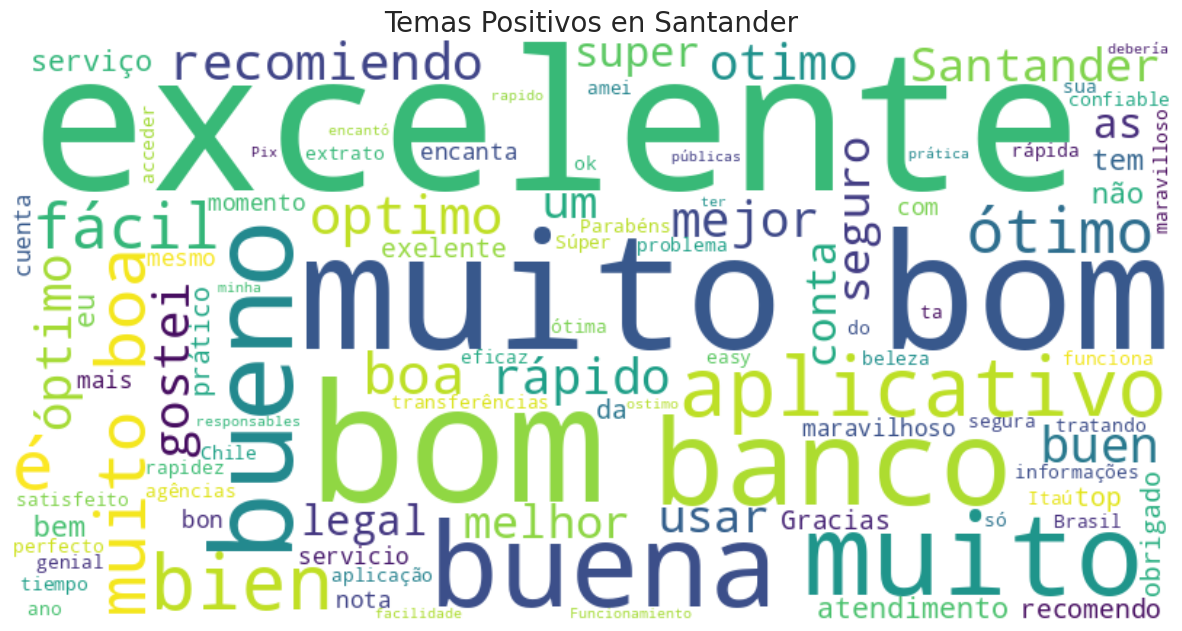

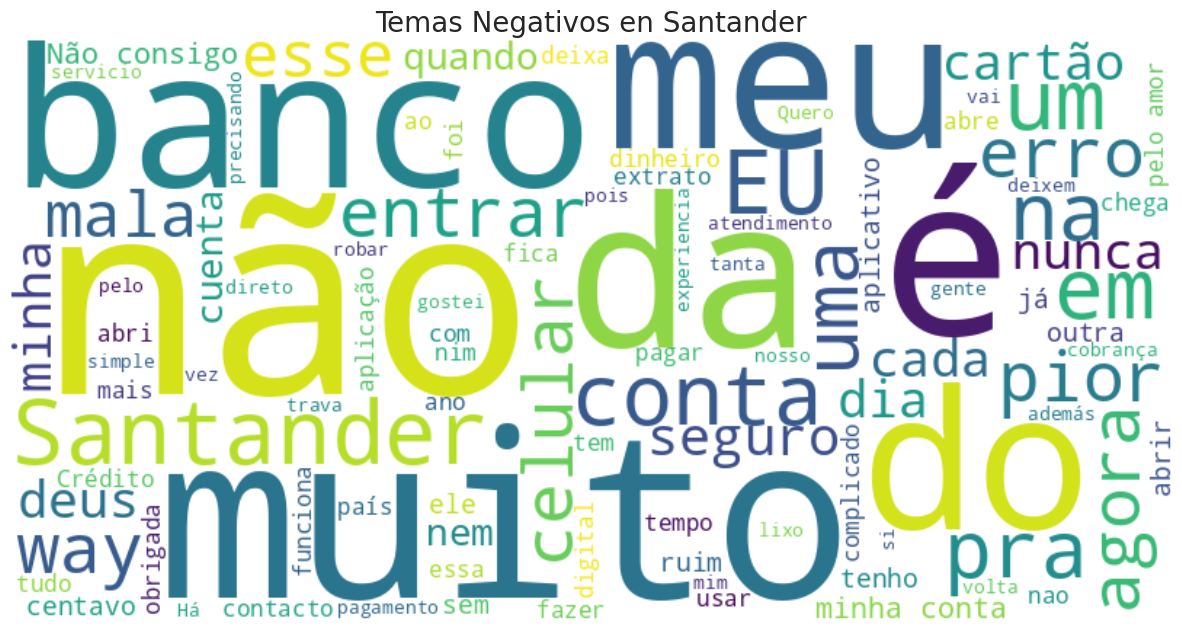


Análisis de texto finalizado.


In [16]:
# Fase 4 - Análisis de Texto (NLP)
# Ahora quiero entender *qué* están diciendo los usuarios en sus opiniones.
# Qué les gusta, qué les molesta, y qué temas aparecen una y otra vez.

# Instalación de librerías necesarias
!pip install -q wordcloud

# Herramientas para procesamiento de lenguaje
import nltk
from nltk.corpus import stopwords

# Descargo las stopwords en español (palabras vacías como "de", "la", etc.)
nltk.download('stopwords')

# Otras librerías necesarias para el análisis y visualización
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configuro el estilo visual para los gráficos
plt.rc('figure', figsize=(15, 8))
print("Herramientas listas. Vamos con el análisis de texto.")

# Paso 1 - Separar opiniones positivas y negativas. Me quedo con las reseñas claramente positivas (4 y 5 estrellas) y claramente negativas (1 y 2 estrellas). Las de 3 las dejo afuera.
df_positivas = df_limpio[df_limpio['score'] >= 4]
df_negativas = df_limpio[df_limpio['score'] <= 2]

print(f"\nOpiniones separadas: {len(df_positivas)} positivas y {len(df_negativas)} negativas.")

# Paso 2 - Función para generar nubes de palabras
# Esta función toma un grupo de reseñas y genera la nube correspondiente.
def generar_nube_palabras(df, titulo, nombre_app):
    # Filtro solo las opiniones de la app que quiero
    df_app = df[df['appName'] == nombre_app]

    # Uno todas las reseñas en un solo texto largo
    texto = " ".join(review for review in df_app.content)

    # Stopwords: palabras comunes que no aportan (como “app”, “aplicación” o “hacer”)
    mis_stopwords = stopwords.words('spanish') + [
        'app', 'aplicación', 'aplicacion', 'hacer', 'puedo', 'ser', 'ver', 'dice', 'ahora', 'mas'
    ]

    # Creo la nube de palabras con las 100 más repetidas
    nube = WordCloud(
        stopwords=mis_stopwords,
        background_color="white",
        width=800,
        height=400,
        max_words=100,
        colormap='viridis'
    ).generate(texto)

    # Muestro el resultado
    plt.figure()
    plt.imshow(nube, interpolation="bilinear")
    plt.title(titulo, fontsize=20)
    plt.axis("off")
    plt.show()

# Paso 3 - Generar las nubes
print("\nGenerando nubes de palabras...")

generar_nube_palabras(df_positivas, 'Temas Positivos en Mercado Pago', 'Mercado Pago')
generar_nube_palabras(df_negativas, 'Temas Negativos en Mercado Pago', 'Mercado Pago')
generar_nube_palabras(df_positivas, 'Temas Positivos en Santander', 'Santander Argentina')
generar_nube_palabras(df_negativas, 'Temas Negativos en Santander', 'Santander Argentina')

print("\nAnálisis de texto finalizado.")

#Filtrando las reseñas por idioma español

In [18]:
# Insight clave: Detectamos que los datos de Santander estaban mezclados con reseñas en portugués. Para asegurar la calidad del análisis para Argentina, voy a añadir un paso para detectar y filtrar solo las reseñas en español.

# Instalo la librería específica para esta tarea.
!pip install -q langdetect

from langdetect import detect, LangDetectException
import pandas as pd

print("¡Herramientas de detección de idioma listas!")

# Paso 1: Crear una función para detectar el idioma de forma segura. La librería 'langdetect' a veces da error si el texto es muy corto o ambiguo. Esta función intentará detectar el idioma y, si no puede, lo marcará como 'error'.
def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return 'error'

# Paso 2: Aplicar la función a nuestra tabla de datos
print("\nDetectando el idioma de cada reseña... (Esto puede tardar un momento)")

# Aplico mi función a la columna 'content' de mi tabla limpia. El resultado lo guardo en una nueva columna llamada 'idioma'.
df_limpio['idioma'] = df_limpio['content'].apply(detectar_idioma)

print("¡Detección completada!")

# Paso 3: Filtrar y crear nuestro DataFrame final en español
# Cuento cuántas reseñas tengo de cada idioma para ver el resultado.
print("\nConteo de reseñas por idioma detectado:")
print(df_limpio['idioma'].value_counts())

# Ahora, creo mi DataFrame final para el análisis, quedándome solo con las que son 'es' (español).
df_final_es = df_limpio[df_limpio['idioma'] == 'es'].copy()

print(f"\nMe quedé con {len(df_final_es)} reseñas que están en español.")
print("Nuestro dataset ahora está enfocado en idioma español")

# Muestra final de la tabla con la nueva columna
print("\n--- Muestra de la tabla con la columna 'idioma' ---")
print(df_limpio.head())



¡Herramientas de detección de idioma listas!

Detectando el idioma de cada reseña... (Esto puede tardar un momento)
¡Detección completada!

Conteo de reseñas por idioma detectado:
idioma
es       480
pt       254
ro        33
sk        32
ca        25
it        25
lt        18
tl        17
id        16
en        14
fr        12
error     10
so         9
nl         8
de         8
lv         8
hu         6
sl         5
fi         5
et         4
sv         2
hr         2
no         1
af         1
da         1
cy         1
sw         1
tr         1
Name: count, dtype: int64

Me quedé con 480 reseñas que están en español.
Nuestro dataset ahora está enfocado en idioma español

--- Muestra de la tabla con la columna 'idioma' ---
                                             content  score  \
0                                  buena muy buena 👌      5   
1  La verdad, últimamente con problemas con Merca...      2   
2  es ineficiente la app mercado pago,ya que cuan...      2   
3  es mi uso dia

#Guardar el data set final con el filtro de idioma aplicado

In [10]:
# Objetivo: Guardar el dataset 100% Limpio en un nuevo archivo CSV., este será el archivo que usaré en Power BI.

nombre_archivo_limpio = 'reseñas_final_ES.csv'
df_final_es.to_csv(nombre_archivo_limpio, index=False, encoding='utf-8-sig')

print(f"¡Listo! Tu archivo limpio y en español ha sido guardado como: '{nombre_archivo_limpio}'")

¡Listo! Tu archivo limpio y en español ha sido guardado como: 'reseñas_final_ES.csv'
